In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Analasys project/salesforcourse-4fe2kehu.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
df.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object

In [ ]:
df.shape

(34867, 16)

# Preprocessing

# Identify-and-handle-missing-values

In [ ]:
# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Delete data in column "Column1"
df = df.drop('Column1', axis=1)

In [ ]:
#Removes data in row 34866
df = df.drop(34866, axis=0)

In [ ]:
#Extract the year and month from the "Date" column
df['Year']=df['Date'].dt.year
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

In [ ]:
# Calculate profit for each product
df['profit'] = df['Revenue'] - df['Cost']
# Calculate profit margin for each product
df['profit_margin'] = df['profit'] / df['Revenue']

In [ ]:
# Convert "Customer Age, Year,and Quantity " column to integer format
df['Customer Age'] = df['Customer Age'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)

In [ ]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Customer Gender', 'Country', 'Product Category', 'Sub Category'])

# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing or non-numeric values
df_encoded.dropna(inplace=True)


In [ ]:
# Removing duplicates
df_unique = df_encoded.drop_duplicates()


In [ ]:
# Extract useful features from date (e.g., year, month)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Feature extraction with PCA for numerical features
num_cols = ['Customer Age', 'Quantity']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[num_cols])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [ ]:
# Handle categorical features: one-hot encoding
cat_cols = ['Country', 'Product Category', 'Sub Category']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cat_cols = encoder.fit_transform(df[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Combine encoded categorical features and numerical features
X = pd.concat([df_pca, pd.DataFrame(encoded_cat_cols)], axis=1)


In [ ]:
# Convert column names to strings
X.columns = X.columns.astype(str)



In [ ]:
# Handle numerical features: impute missing values with mean and standardize
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Split the data into training and testing sets
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
df.describe()


,index,Date,Year,Month,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit,profit_margin
count,34866.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2016-01-19 18:35:05.110996224,2015.569237,6.317845,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074,64.865542,0.134077
min,0.000000,2015-01-01 00:00:00,2015.000000,1.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,-0.686747
25%,8716.250000,2015-10-26 00:00:00,2015.000000,3.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,5.000000,0.061679
50%,17432.500000,2016-01-28 00:00:00,2016.000000,6.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,27.000000,0.147963
75%,26148.750000,2016-04-26 00:00:00,2016.000000,9.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,96.000000,0.225677
max,34865.000000,2016-07-31 00:00:00,2016.000000,12.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,0.500000
std,10065.091579,NaN,0.495190,3.465317,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597,152.879908,0.135445


In [ ]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,profit,profit_margin
0,0,2016-02-19,2016,2,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0,2016-02,29.0,0.266055
1,1,2016-02-20,2016,2,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0,2016-02,8.0,0.140351
2,2,2016-02-27,2016,2,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0,2016-02,4.0,0.266667
3,3,2016-03-12,2016,3,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0,2016-03,58.0,0.248927
4,4,2016-03-12,2016,3,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0,2016-03,20.0,0.160000


# EDA

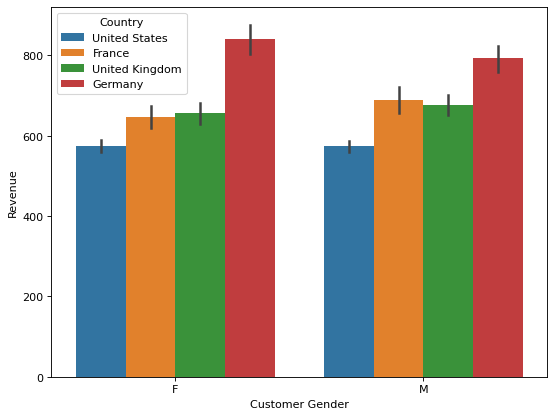

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ax=sns.barplot(x='Customer Gender',y='Revenue', hue="Country" , data=df)

<Axes: xlabel='Country', ylabel='Quantity'>

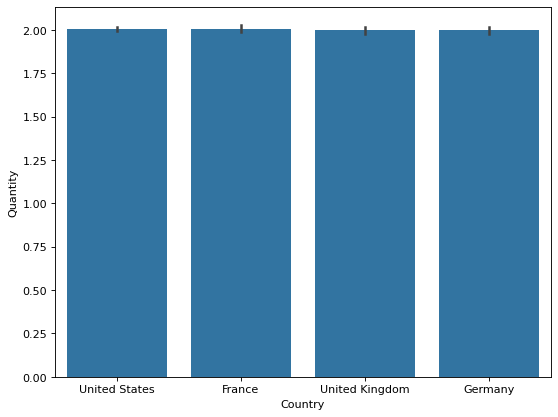

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.barplot(x='Country',y='Quantity' , data=df)

In [ ]:
df_by_country=df.groupby('Country')[['Revenue','Cost']].sum().reset_index()
df_by_country

,Country,Revenue,Cost
0,France,3446104.0,3173447.0
1,Germany,4244510.0,3285685.0
2,United Kingdom,4276220.0,3947265.0
3,United States,10377742.0,9676577.0


<Axes: xlabel='Country', ylabel='Revenue'>

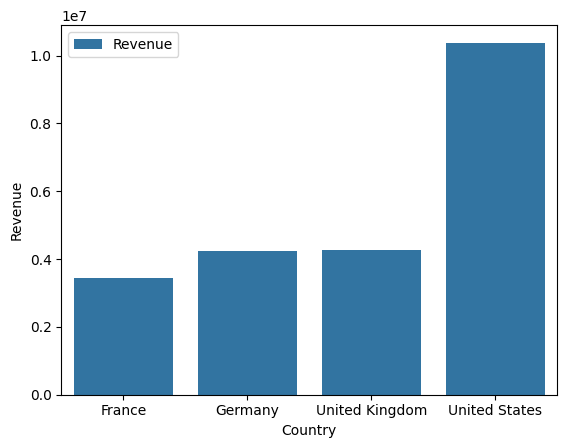

In [ ]:
sns.barplot(x='Country', y='Revenue', data=df_by_country, label='Revenue')

<Axes: xlabel='Country', ylabel='Cost'>

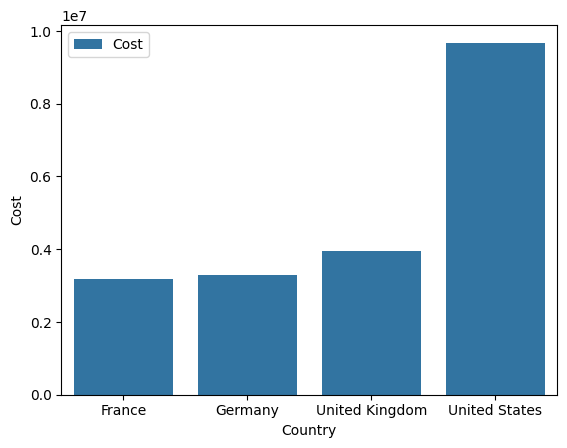

In [ ]:
sns.barplot(x='Country', y='Cost', data=df_by_country, label='Cost')

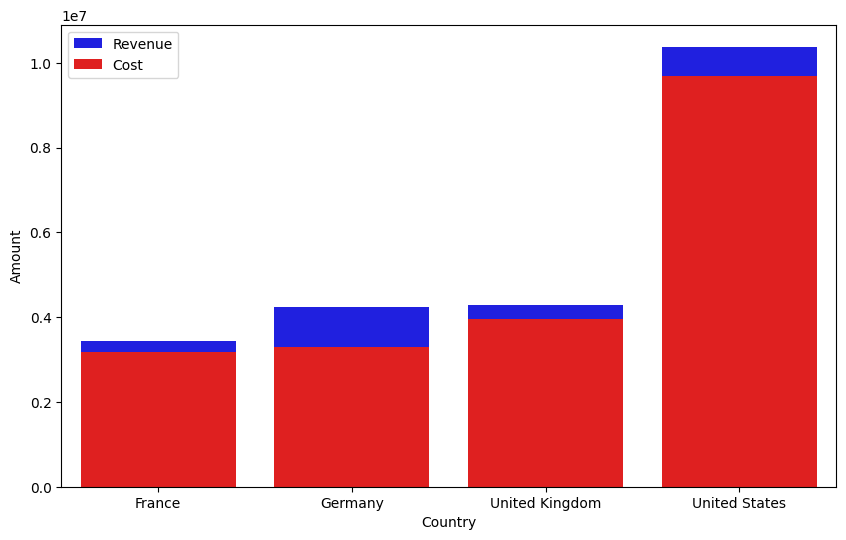

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=df_by_country, color='b', label='Revenue')
sns.barplot(x='Country', y='Cost', data=df_by_country, color='r', label='Cost')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


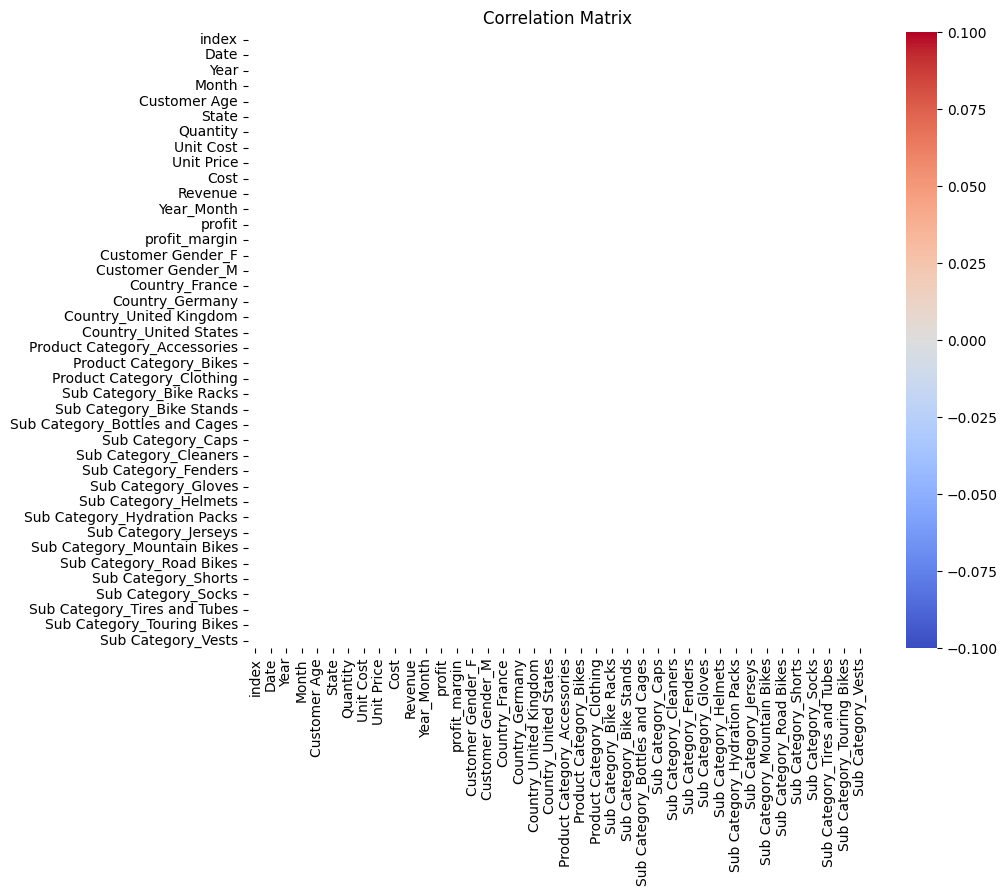

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Customer Age', ylabel='Cost'>

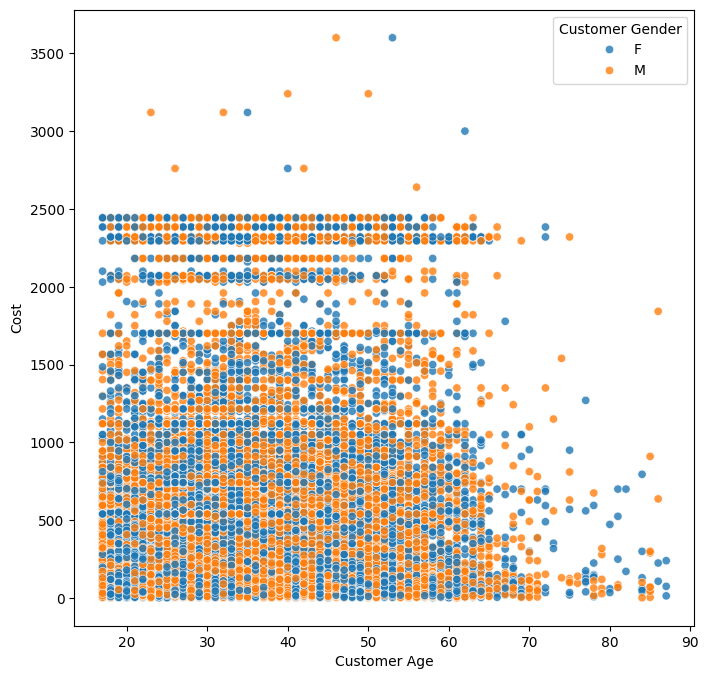

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x="Customer Age", y="Cost", data=df, hue='Customer Gender', alpha=0.8)

In [ ]:
df_by_category2= df.groupby('Product Category')[['Quantity']].sum().reset_index()
df_by_category2

,Product Category,Quantity
0,Accessories,45048
1,Bikes,14291
2,Clothing,10481


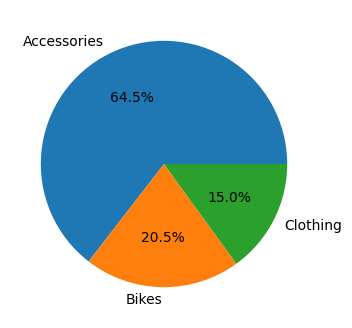

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(df_by_category2['Quantity'], labels=df_by_category2['Product Category'], autopct='%1.1f%%')
plt.show()

In [ ]:
df_by_category3= df.groupby(['Product Category','Sub Category'])[['Quantity']].sum().reset_index()
df_by_category3

,Product Category,Sub Category,Quantity
0,Accessories,Bike Racks,204
1,Accessories,Bike Stands,304
2,Accessories,Bottles and Cages,10558
3,Accessories,Cleaners,1102
4,Accessories,Fenders,1494
5,Accessories,Helmets,8387
6,Accessories,Hydration Packs,786
7,Accessories,Tires and Tubes,22213
8,Bikes,Mountain Bikes,5499
9,Bikes,Road Bikes,6119


In [ ]:
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,profit,profit_margin
0,0,2016-02-19,2016,2,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0,2016-02,29.0,0.266055
1,1,2016-02-20,2016,2,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0,2016-02,8.0,0.140351
2,2,2016-02-27,2016,2,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0,2016-02,4.0,0.266667
3,3,2016-03-12,2016,3,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0,2016-03,58.0,0.248927
4,4,2016-03-12,2016,3,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0,2016-03,20.0,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015,3,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.00,1487.000000,2049.0,1487.0,2015-03,-562.0,-0.377942
34862,34862,2016-02-07,2016,2,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160.00,985.500000,2320.0,1971.0,2016-02,-349.0,-0.177067
34863,34863,2015-03-13,2015,3,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,1583.000000,2049.0,1583.0,2015-03,-466.0,-0.294378
34864,34864,2015-04-05,2015,4,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,560.666667,2049.0,1682.0,2015-04,-367.0,-0.218193


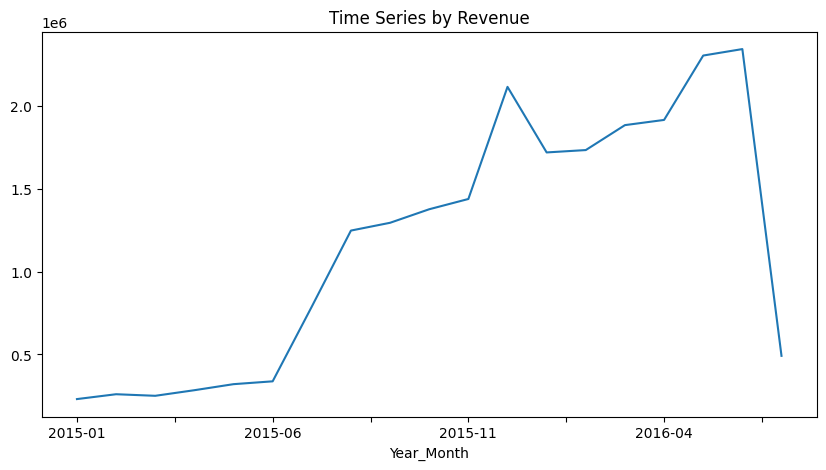

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby(['Year_Month'])['Revenue'].sum().plot(title='Time Series by Revenue');

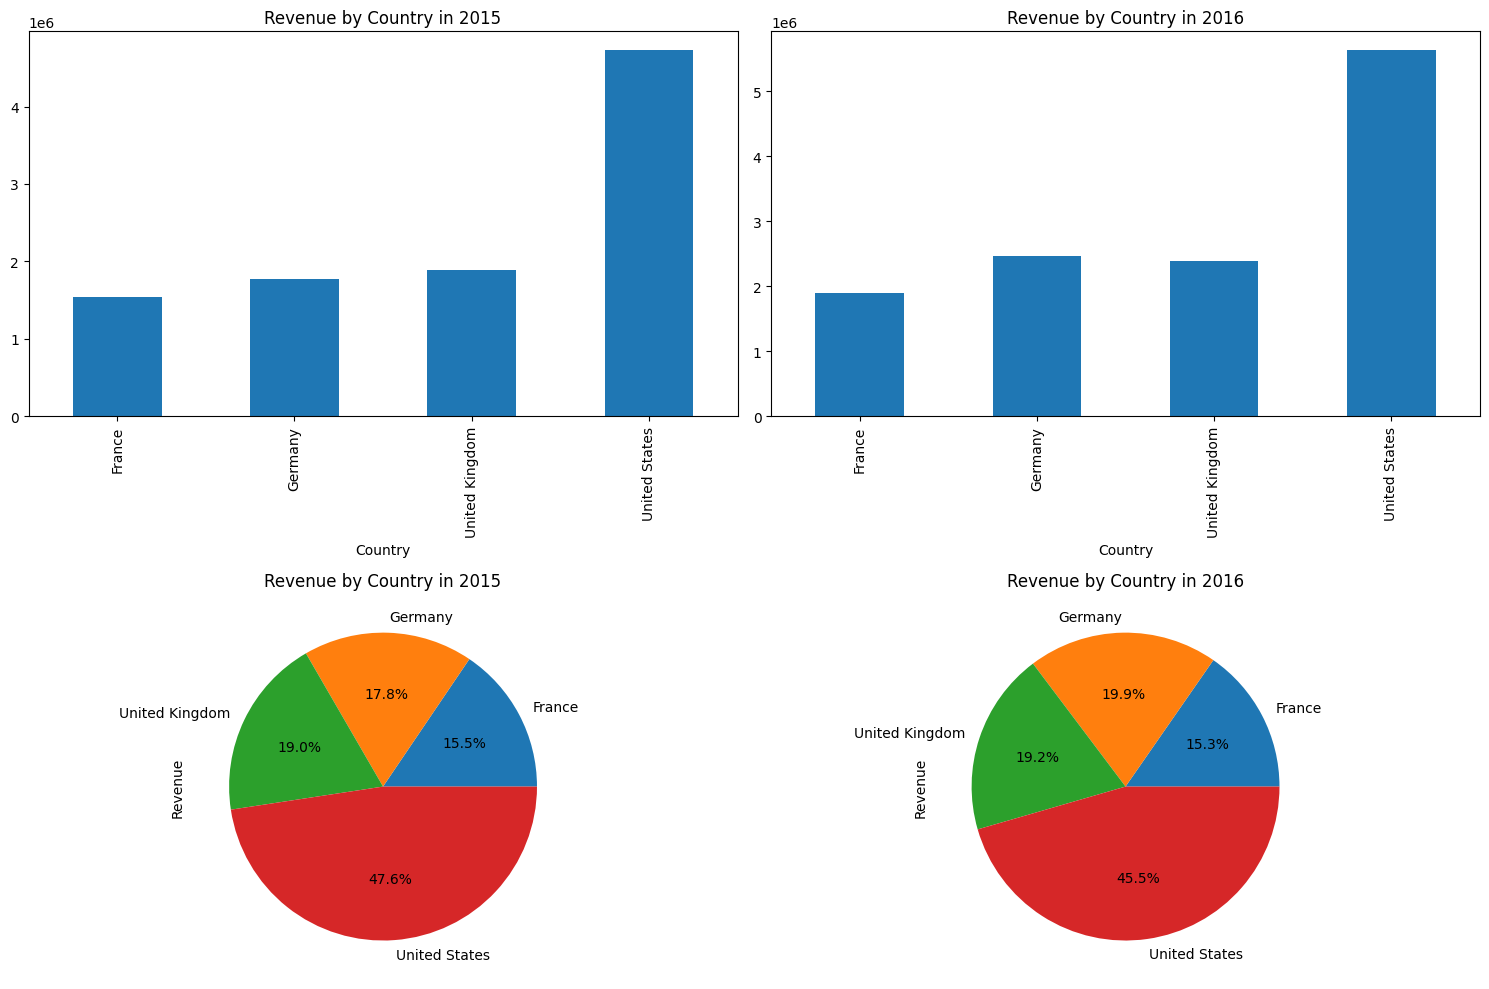

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1, title="Revenue by Country in 2015")

df[df['Year']==2015].groupby('Country')['Revenue'].sum().plot.bar()
plt.subplot(2, 2, 2, title="Revenue by Country in 2016")

df[df['Year']==2016].groupby('Country')['Revenue'].sum().plot.bar()
plt.subplot(2, 2, 3, title="Revenue by Country in 2015")
df[df['Year']==2015].groupby('Country')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(2, 2, 4, title="Revenue by Country in 2016")
df[df['Year']==2016].groupby('Country')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Quantity'}, xlabel='Year'>

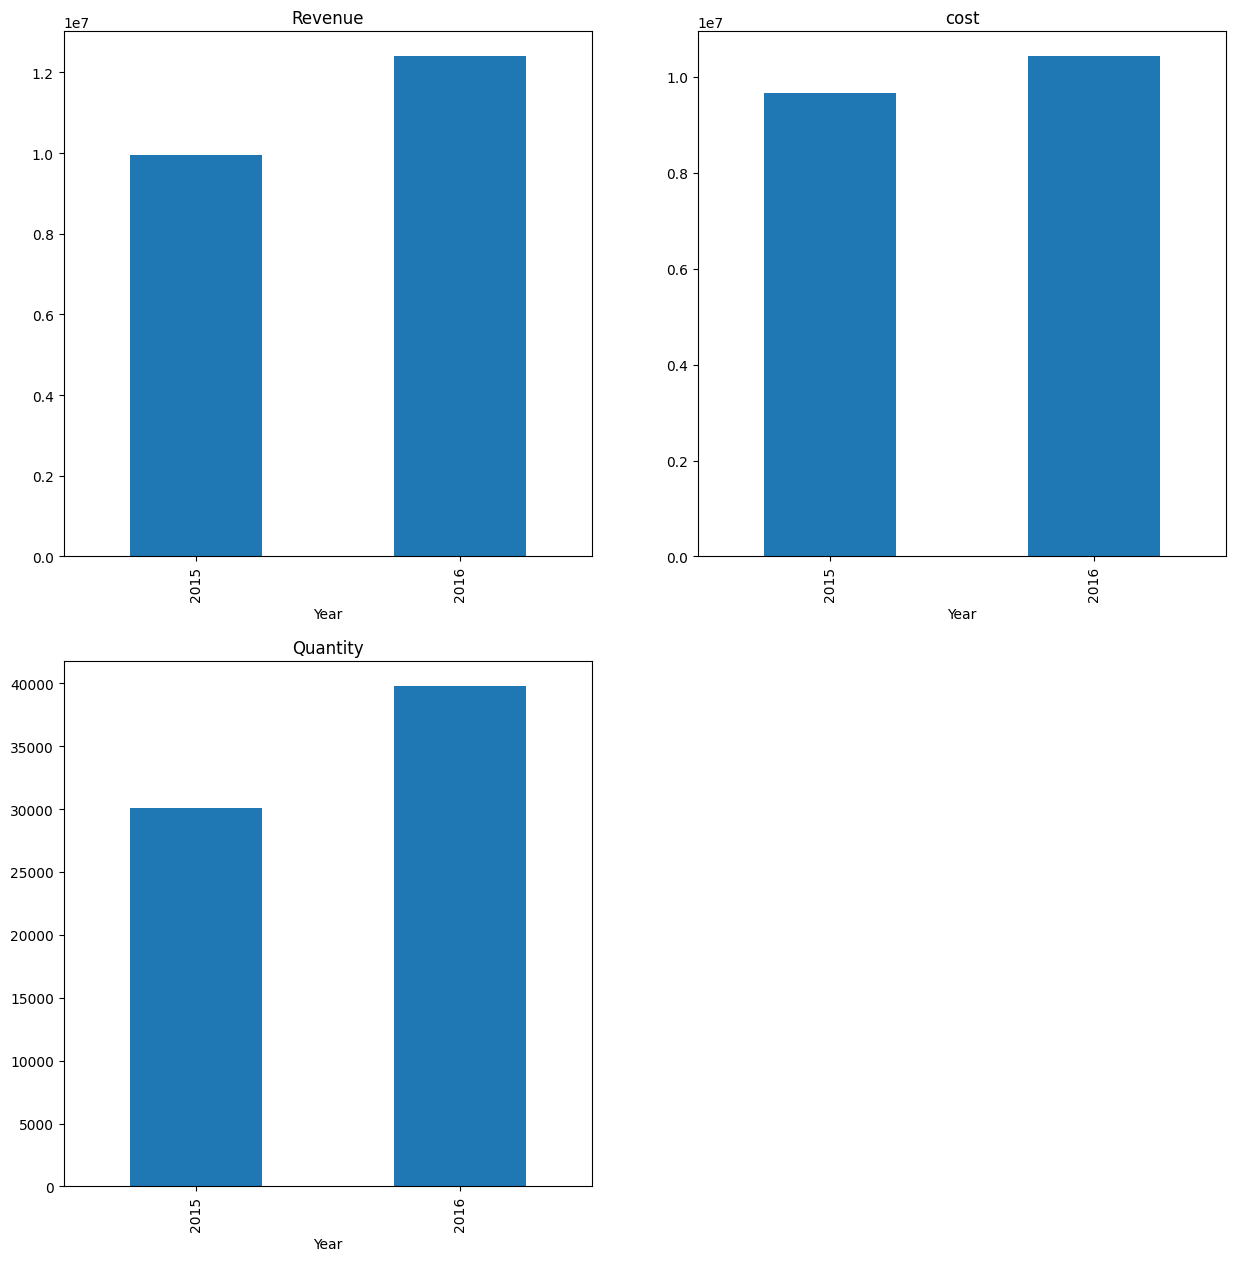

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1, title='Revenue')
df.groupby('Year')['Revenue'].sum().plot.bar()
plt.subplot(2,2,2, title='cost')
df.groupby('Year')['Cost'].sum().plot.bar()
plt.subplot(2,2,3, title='Quantity')
df.groupby('Year')['Quantity'].sum().plot.bar()

<Axes: title={'center': 'Revenue in 2016'}, ylabel='Revenue'>

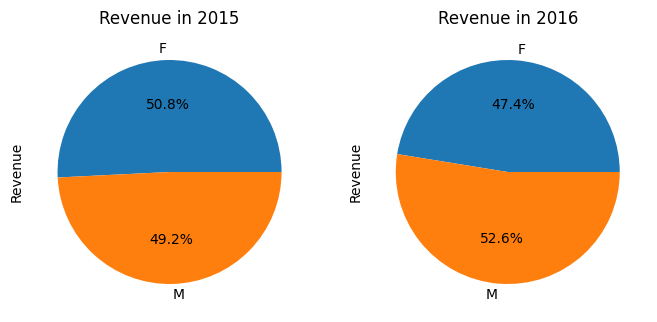

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1, title='Revenue in 2015')
df[df['Year']==2015].groupby('Customer Gender')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(2, 2, 2, title='Revenue in 2016')
df[df['Year']==2016].groupby('Customer Gender')['Revenue'].sum().plot.pie(autopct="%1.1f%%")

<Axes: title={'center': 'Revenue for male'}, xlabel='Year'>

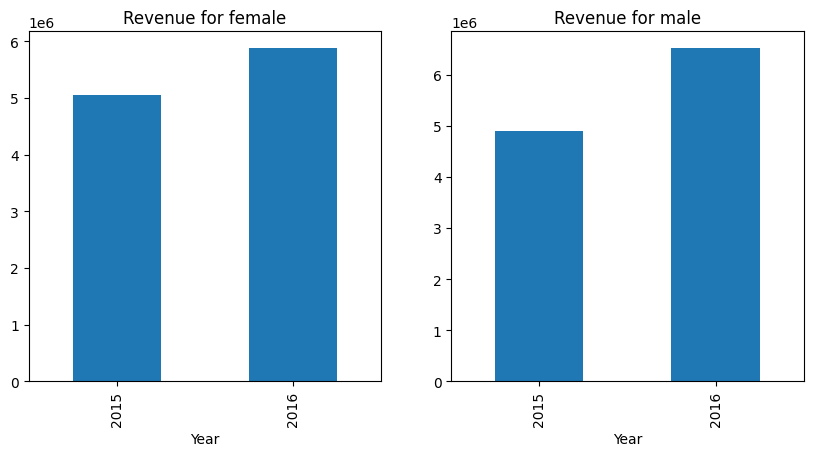

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1, title='Revenue for female')
df[df['Customer Gender']=='F'].groupby('Year')['Revenue'].sum().plot.bar()
plt.subplot(2, 2, 2, title='Revenue for male')
df[df['Customer Gender']=='M'].groupby('Year')['Revenue'].sum().plot.bar()

In [ ]:
# Group by Year_Month and calculate the sum of Cost, Revenue, and profit
grouped = df.groupby('Year_Month').agg({'Cost': 'sum', 'Revenue': 'sum', 'profit': 'sum'}).reset_index()

# Create the line plot using Plotly Express
fig = px.line(grouped, x='Year_Month', y=['Cost', 'Revenue', 'profit'], title='Monthly Performance')

# Update axis labels
fig.update_xaxes(title='Year-Month')
fig.update_yaxes(title='Amount ($)')

# Display the plot
fig.show()


In [ ]:
# Group by sub category and calculate total quantity sold
category_sales = df.groupby('Sub Category')['Quantity'].sum().reset_index()

In [ ]:
fig = px.bar(category_sales, y='Sub Category', x='Quantity', text_auto='.2s',
            title="Product Sales Quantity Based on Sub Categories")
fig.show()

In [ ]:
category_profit= df.groupby('Sub Category')['profit'].sum().reset_index()

In [ ]:
fig = px.bar(category_profit, y='Sub Category', x='profit', text_auto='.2s',
            title="Profit by Sub Category")
fig.update_xaxes(title='Profit($)')
fig.show()

In [ ]:
category_margin = df.groupby('Sub Category')['profit_margin'].mean().reset_index()


In [ ]:
fig = px.bar(category_margin, y='Sub Category', x='profit_margin',
            title="Profit Margin by Sub Category")
fig.show()

In [ ]:
fig = px.histogram(df, x="Customer Age")
fig.show()

In [ ]:
# Group by Customer Age and product category, sum quantity sold
df_grouped = df.groupby(["Customer Age", "Product Category"])["Quantity"].sum().reset_index()

# Find top selling product for each Customer Age
top_products = df_grouped.groupby("Customer Age").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Customer Age", y="Quantity", color="Product Category", title="Top Selling Products by Customer Age")
fig.show()


In [ ]:
# Group by Customer Age and product category, sum quantity sold
df_grouped = df.groupby(["Customer Age", "Sub Category"])["Quantity"].sum().reset_index()

# Find top selling product for each Customer Age
top_products = df_grouped.groupby("Customer Age").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Customer Age", y="Quantity", color="Sub Category", title="Top Selling Sub Category Products by Customer Age")
fig.show()


In [ ]:
country_sales = df.groupby('Country')['profit'].sum().reset_index()

In [ ]:
fig = px.pie(df, values='profit', names='Country', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
# Group by country and sub category, sum quantity sold
df_grouped = df.groupby(["Country", "Sub Category"])["Quantity"].sum().reset_index()

# Find top selling product for each country
top_products = df_grouped.groupby("Country").apply(lambda x: x.loc[x.Quantity.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Country", y="Quantity", color="Sub Category", title="Top Selling Sub Category Products by Country")
fig.show()

In [ ]:
# Group by country and sub category, sum quantity sold
df_grouped = df.groupby(["Country", "Sub Category"])["profit_margin"].mean().reset_index()

# Find top selling product for each country
top_products = df_grouped.groupby("Country").apply(lambda x: x.loc[x.profit_margin.idxmax()])

# Create bar chart
fig = px.bar(top_products, x="Country", y="profit_margin", color="Sub Category", title="Top Selling Products by Country and Profit Margin")
fig.show()

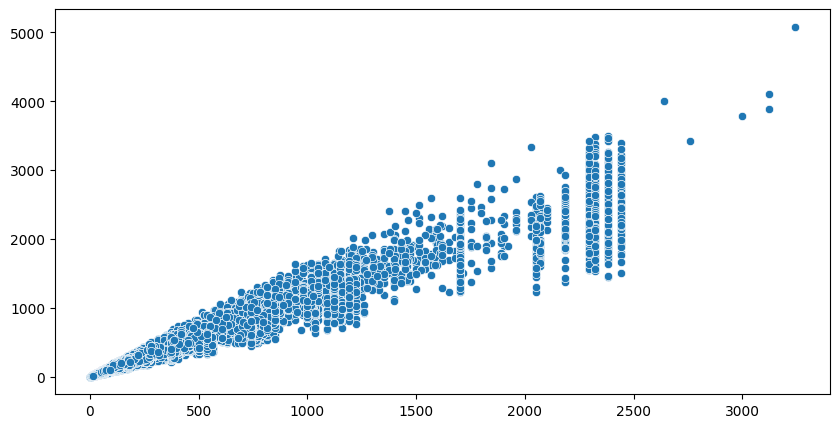

In [ ]:
fig = plt.figure(figsize=(10,5),)

ax = sns.scatterplot(data = df, x= 'Unit Cost', y = 'Unit Price' )

plt.title("", pad=10, fontsize=15)
plt.ylabel("", labelpad=20)
plt.xlabel("", labelpad=20)

plt.axis('tight')

plt.show()

# Machine Learning Models


# multiple linear regression model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Select features and target variable
X = df[['Customer Age', 'Quantity', 'Country', 'Product Category', 'Sub Category', 'Year']]  # Features
y = df['Revenue']  # Target variable

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
X_encoded = encoder.fit_transform(X[['Country', 'Product Category', 'Sub Category', 'Year']])

# Combine encoded features with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Country', 'Product Category', 'Sub Category', 'Year']))
X_final = pd.concat([X[['Customer Age', 'Quantity']], X_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
lm_multiple = LinearRegression()
lm_multiple.fit(X_train, y_train)

# Make predictions on the testing set
predictions_multiple = lm_multiple.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



# Polynomial Regression and Pipelines Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial features
degree = 2

# Define the preprocessing steps for categorical variables
categorical_features = ['Country', 'Product Category', 'Sub Category']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the pipeline
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),  # One-hot encode categorical variables
    PolynomialFeatures(degree=degree),  # Generate polynomial features
    StandardScaler(with_mean=False),  # Standardize features without centering sparse matrices
    LinearRegression()  # Apply linear regression
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
predictions_poly = pipeline.predict(X_test)


# Random Forest Regressor Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
X = df[['Customer Age', 'Quantity', 'Country', 'Product Category', 'Sub Category', 'Year']]  # Features
y = df['Revenue']  # Target variable

# Define numerical and categorical features
numeric_features = ['Customer Age', 'Quantity']
categorical_features = ['Country', 'Product Category', 'Sub Category', 'Year']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = SimpleImputer(strategy='mean', fill_value=0)  # Impute missing values with mean
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with a constant value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline with preprocessing and the Random Forest Regressor model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline (including preprocessing and the model)
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
predictions_rf = pipeline.predict(X_test)



# Support Vector Machine Regression Model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR  # Import SVR class

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Customer Age', 'Quantity']
categorical_features = ['Country', 'Product Category', 'Sub Category', 'Year']

numeric_transformer = SimpleImputer(strategy='mean', fill_value=0)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define SVR model with preprocessor
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR())  # Use SVR class for Support Vector Regression
])

# Fit the SVR model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions_svm = svm_model.predict(X_test)


# Comparing the results of the models


In [ ]:
# Evaluate Multiple Linear Regression Model
print('\nMultiple Linear Regression Model:')
print('Mean Squared Error:', mean_squared_error(y_test, predictions_multiple))
print('R-squared:', r2_score(y_test, predictions_multiple))



# Evaluate Polynomial Regression Model
print('\nPolynomial Regression Model (Degree =', degree, '):')
print('Mean Squared Error:', mean_squared_error(y_test, predictions_poly))
print('R-squared:', r2_score(y_test, predictions_poly))



# Evaluate Random Forest Regressor Model
print('\nRandom Forest Regressor Model:')
print('Mean Squared Error:', mean_squared_error(y_test, predictions_rf))
print('R-squared:', r2_score(y_test, predictions_rf))



# Evaluate Support Vector Machine Regression Model
print('\nSupport Vector Machine Regression Model:')
print('Mean Squared Error:', mean_squared_error(y_test, predictions_svm))
print('R-squared:', r2_score(y_test, predictions_svm))



Multiple Linear Regression Model:
Mean Squared Error: 211324.4906444509
R-squared: 0.61039486639804

Polynomial Regression Model (Degree = 2 ):
Mean Squared Error: 215848.68857816703
R-squared: 0.602053898746672

Random Forest Regressor Model:
Mean Squared Error: 244659.596098964
R-squared: 0.5489371140351478

Support Vector Machine Regression Model:
Mean Squared Error: 631313.8043791353
R-squared: -0.16391194579393287


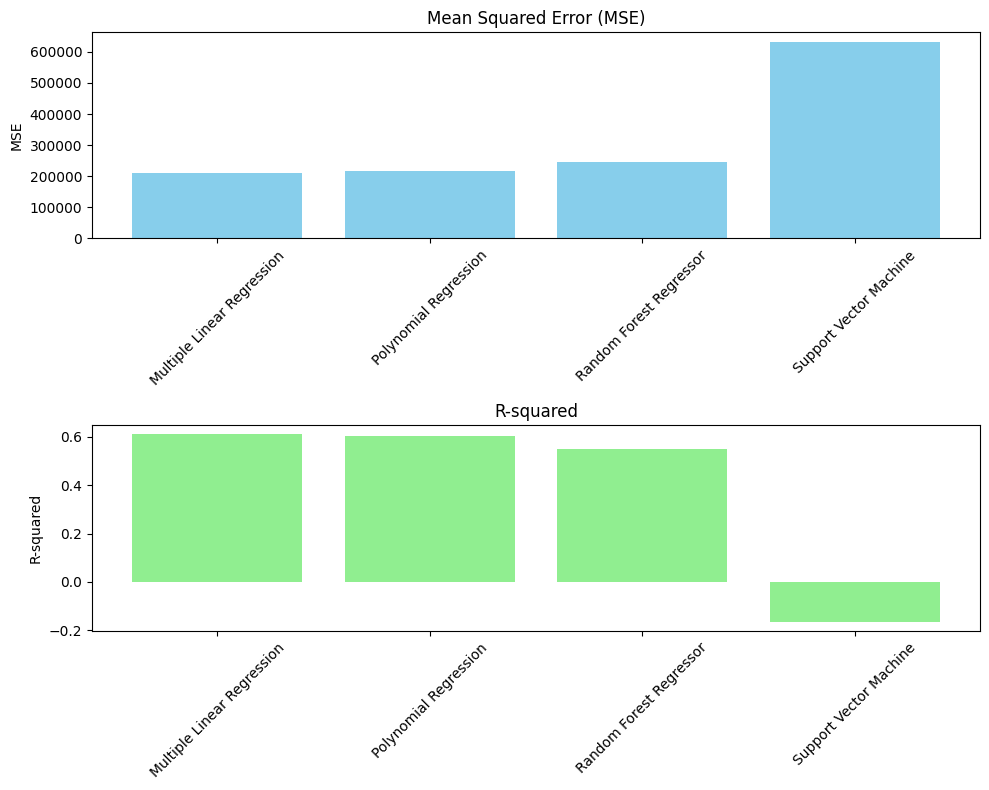

In [ ]:
import matplotlib.pyplot as plt

# Mean Squared Error (MSE) values
mse_values = [mean_squared_error(y_test, predictions_multiple),
              mean_squared_error(y_test, predictions_poly),
              mean_squared_error(y_test, predictions_rf),
              mean_squared_error(y_test, predictions_svm)]

# R-squared values
r2_values = [r2_score(y_test, predictions_multiple),
             r2_score(y_test, predictions_poly),
             r2_score(y_test, predictions_rf),
             r2_score(y_test, predictions_svm)]

# Model names
model_names = ['Multiple Linear Regression', 'Polynomial Regression', 'Random Forest Regressor', 'Support Vector Machine']

# Create subplots for MSE and R-squared
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot MSE
axes[0].bar(model_names, mse_values, color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot R-squared
axes[1].bar(model_names, r2_values, color='lightgreen')
axes[1].set_title('R-squared')
axes[1].set_ylabel('R-squared')

# Rotate x-axis labels for better readability
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Show plot
plt.tight_layout()
plt.show()


# ML

# Polynomial Regression and Pipelines Model

In [ ]:
# 1. Check and Handle NaNs: (Replace with your chosen strategy)
print(df.isnull().sum())
#df.fillna(df.mean(), inplace=True)  # Example: impute with mean

# 2. Check and Handle Infinite values: (Replace with your chosen strategy)
print(df.isin([float('inf'), float('-inf')]).sum())
df.replace([float('inf'), float('-inf')], np.nan, inplace=True) # Example: replace with NaN

# 3. Scale numerical features:
scaler = StandardScaler()
numerical_cols = ["Customer Age", "Quantity"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert categorical features to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=["Product Category", "Customer Gender"])#

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Year_Month          0
profit              0
profit_margin       0
dtype: int64
index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Year_Month          0
profit              0
profit_margin       0
dtype: int64


In [ ]:
# Select independent and dependent variables
X = df[["Customer Age", "Quantity", "Product Category_Accessories",
         "Product Category_Bikes", "Product Category_Clothing",
         "Customer Gender_F", "Customer Gender_M"]]
y = df["Revenue"]

df

,index,Date,Year,Month,Customer Age,Country,State,Sub Category,Quantity,Unit Cost,...,Cost,Revenue,Year_Month,profit,profit_margin,Product Category_Accessories,Product Category_Bikes,Product Category_Clothing,Customer Gender_F,Customer Gender_M
0,0,2016-02-19,2016,2,-0.664363,United States,Washington,Tires and Tubes,-1.231716,80.00,...,80.0,109.0,2016-02,29.0,0.266055,True,False,False,True,False
1,1,2016-02-20,2016,2,-0.664363,United States,Washington,Gloves,-0.003101,24.50,...,49.0,57.0,2016-02,8.0,0.140351,False,False,True,True,False
2,2,2016-02-27,2016,2,-0.664363,United States,Washington,Tires and Tubes,1.225514,3.67,...,11.0,15.0,2016-02,4.0,0.266667,True,False,False,True,False
3,3,2016-03-12,2016,3,-0.664363,United States,Washington,Tires and Tubes,-0.003101,87.50,...,175.0,233.0,2016-03,58.0,0.248927,True,False,False,True,False
4,4,2016-03-12,2016,3,-0.664363,United States,Washington,Tires and Tubes,1.225514,35.00,...,105.0,125.0,2016-03,20.0,0.160000,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015,3,0.145518,France,Charente-Maritime,Mountain Bikes,-1.231716,2049.00,...,2049.0,1487.0,2015-03,-562.0,-0.377942,False,True,False,False,True
34862,34862,2016-02-07,2016,2,0.145518,France,Hauts de Seine,Mountain Bikes,-0.003101,1160.00,...,2320.0,1971.0,2016-02,-349.0,-0.177067,False,True,False,False,True
34863,34863,2015-03-13,2015,3,0.145518,France,Hauts de Seine,Mountain Bikes,-1.231716,2049.00,...,2049.0,1583.0,2015-03,-466.0,-0.294378,False,True,False,False,True
34864,34864,2015-04-05,2015,4,0.145518,France,Hauts de Seine,Mountain Bikes,1.225514,683.00,...,2049.0,1682.0,2015-04,-367.0,-0.218193,False,True,False,False,True


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply a second-degree polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_pr = poly.fit_transform(X_train)
X_test_pr = poly.transform(X_test)
# Create a Ridge Regression model
ridge_model = Ridge(alpha=1)
# Train the model
ridge_model.fit(X_train_pr, y_train)

Ridge(alpha=1)

In [ ]:
# Make predictions on the test data
yhat = ridge_model.predict(X_test_pr)
# Display the first five predictions and their actual values
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [340.65260279 320.23892489 336.80777846 334.48895182]
test set : [ 90.  96. 177. 498.]


In [ ]:
# Search for best Alpha value using Grid Search CV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(X_train_pr, y_train)
BestRR=Grid1.best_estimator_
print(BestRR)

Ridge(alpha=10)


In [ ]:
# Calculate R-squared for the optimal model on the test data
test_score = BestRR.score(X_test_pr, y_test)
print("R-squared on the test data:", test_score)

R-squared on the test data: 0.4800890660073027


predicted: [340.65260279 320.23892489 336.80777846 334.48895182]
test set : [ 90.  96. 177. 498.]


100%|██████████| 7/7 [00:00<00:00, 18.33it/s, Test Score=0.0206, Train Score=0.0204]


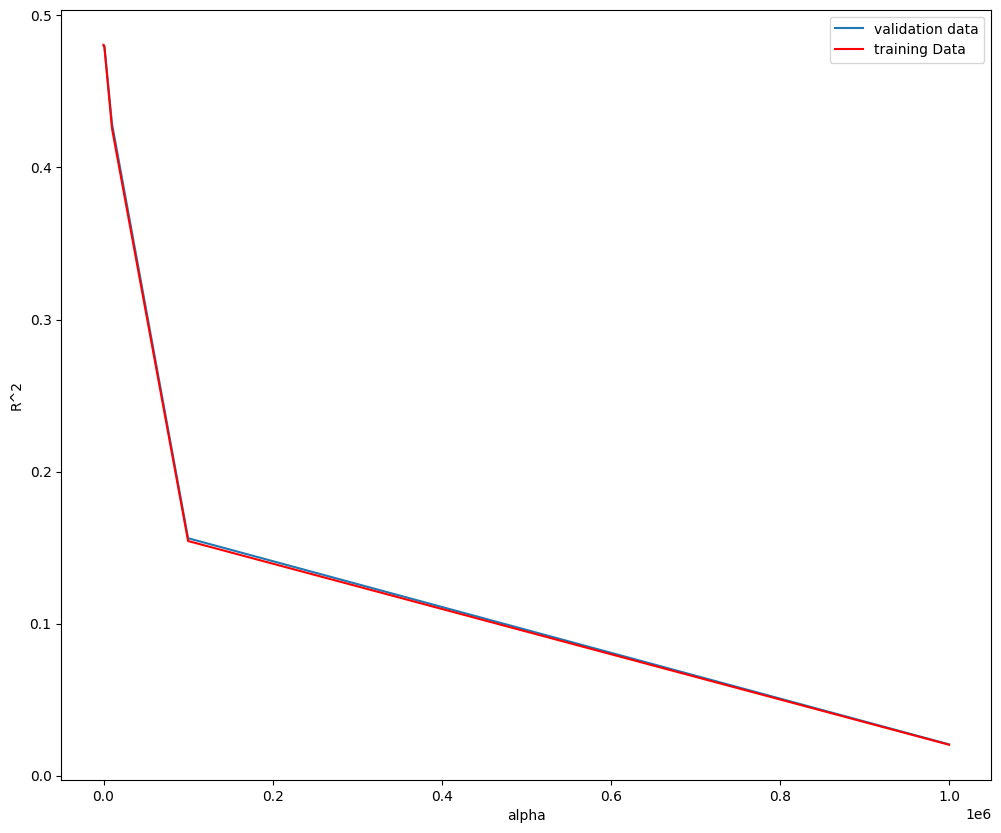

In [ ]:
# Apply a second-degree polynomial transformation
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.transform(X_test)  # Use transform, not fit_transform on the test data

# Create a Ridge Regression model (fixed typo: "RigeModel" -> "RidgeModel")
RidgeModel = Ridge(alpha=1)

# Train the model
RidgeModel.fit(x_train_pr, y_train)

# Make predictions on the test data
yhat = RidgeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

# Evaluate R-squared for various alpha values (fixed typo: "Rsqu" -> "Rsq")
Rsq_test = []
Rsq_train = []
Alpha = 10**np.arange(0, 7)  # Iterate from 10^0 to 10^6
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsq_test.append(test_score)
    Rsq_train.append(train_score)

# Plot the results
plt.figure(figsize=(12, 10))
plt.plot(Alpha, Rsq_test, label='validation data')
plt.plot(Alpha, Rsq_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show() # Add this to display the plot

# multiple linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_pr, y_train)

# Make predictions on the test data
yhat_linear = linear_model.predict(X_test_pr)

print('predicted (Linear Regression):', yhat_linear[0:4])
print('test set :', y_test[0:4].values)

# Evaluate R-squared for the Linear Regression model
test_score_linear = linear_model.score(X_test_pr, y_test)
train_score_linear = linear_model.score(X_train_pr, y_train)
print("R-squared on the test data (Linear Regression):", test_score_linear)

# Note: Linear Regression doesn't have hyperparameters like Ridge, so no need for grid search
# You can directly evaluate the model and plot the results if needed


predicted (Linear Regression): [342.75 318.25 335.25 332.  ]
test set : [ 90.  96. 177. 498.]
R-squared on the test data (Linear Regression): 0.4801236098125087


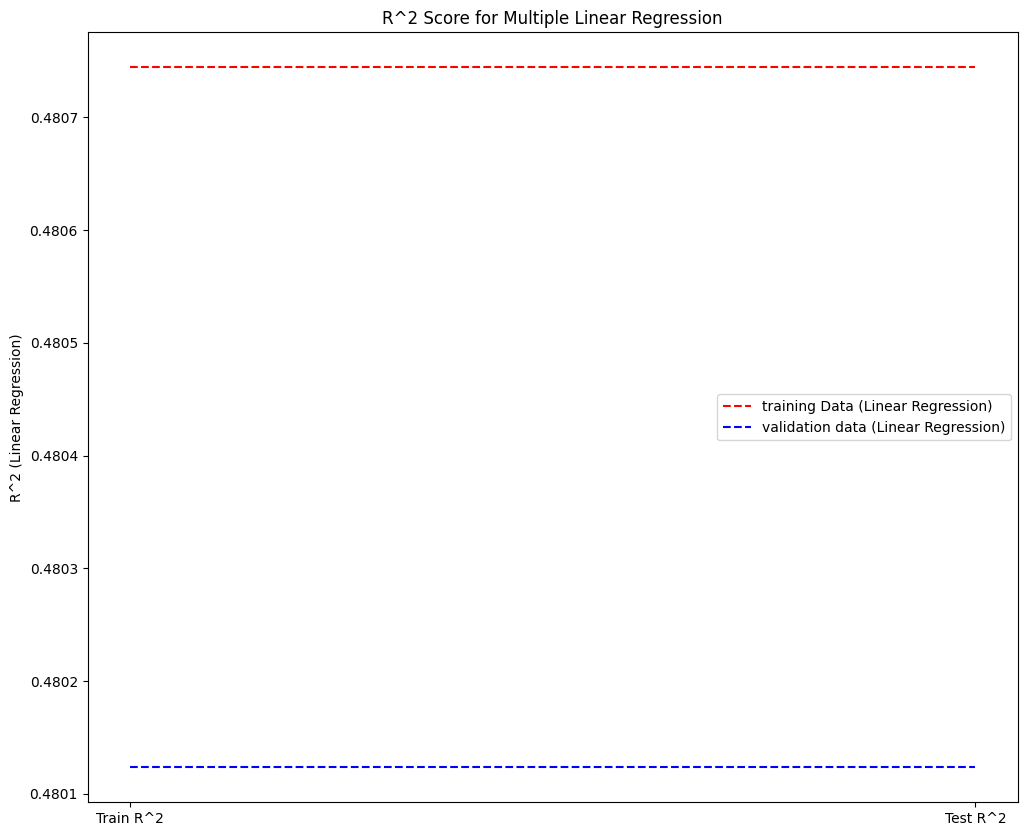

In [ ]:
import matplotlib.pyplot as plt

# Plot the results for Multiple Linear Regression
plt.figure(figsize=(12, 10))
plt.plot([0, 1], [train_score_linear, train_score_linear], 'r--', label='training Data (Linear Regression)')
plt.plot([0, 1], [test_score_linear, test_score_linear], 'b--', label='validation data (Linear Regression)')
plt.xticks([0, 1], ['Train R^2', 'Test R^2'])
plt.ylabel('R^2 (Linear Regression)')
plt.title('R^2 Score for Multiple Linear Regression')
plt.legend()
plt.show()


# Random Forest Regressor Model

predicted (Random Forest): [292.18554987 282.78262402 337.13488662 363.14892974]
test set : [ 90.  96. 177. 498.]


100%|██████████| 5/5 [01:19<00:00, 15.84s/it, Test Score (Random Forest)=0.457, Train Score (Random Forest)=0.509]


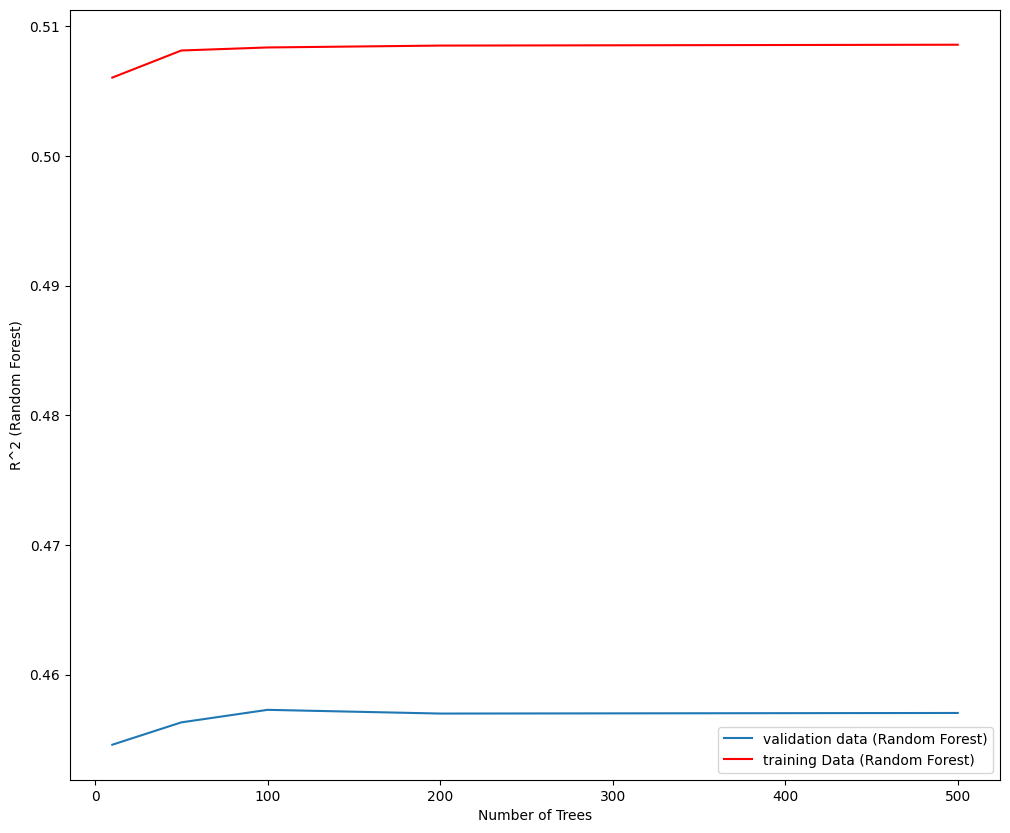

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
forest_model = RandomForestRegressor(random_state=42)

# Train the model
forest_model.fit(X_train_pr, y_train)

# Make predictions on the test data
yhat_forest = forest_model.predict(X_test_pr)

print('predicted (Random Forest):', yhat_forest[0:4])
print('test set :', y_test[0:4].values)

# Evaluate R-squared for the RandomForestRegressor model
Rsq_test_forest = []
Rsq_train_forest = []
n_estimators = [10, 50, 100, 200, 500]  # Number of trees in the forest
pbar_forest = tqdm(n_estimators)

for n_est in pbar_forest:
    forest_model = RandomForestRegressor(n_estimators=n_est, random_state=42)
    forest_model.fit(X_train_pr, y_train)
    test_score_forest = forest_model.score(X_test_pr, y_test)
    train_score_forest = forest_model.score(X_train_pr, y_train)
    pbar_forest.set_postfix({"Test Score (Random Forest)": test_score_forest, "Train Score (Random Forest)": train_score_forest})
    Rsq_test_forest.append(test_score_forest)
    Rsq_train_forest.append(train_score_forest)

# Plot the results for RandomForestRegressor
plt.figure(figsize=(12, 10))
plt.plot(n_estimators, Rsq_test_forest, label='validation data (Random Forest)')
plt.plot(n_estimators, Rsq_train_forest, 'r', label='training Data (Random Forest)')
plt.xlabel('Number of Trees')
plt.ylabel('R^2 (Random Forest)')
plt.legend()
plt.show()


# SVM

predicted (SVM): [201.09609765 170.78496767 204.09991003 210.9459427 ]
test set : [ 90.  96. 177. 498.]


100%|██████████| 6/6 [16:45<00:00, 167.55s/it, Test Score (SVM)=0.411, Train Score (SVM)=0.417]


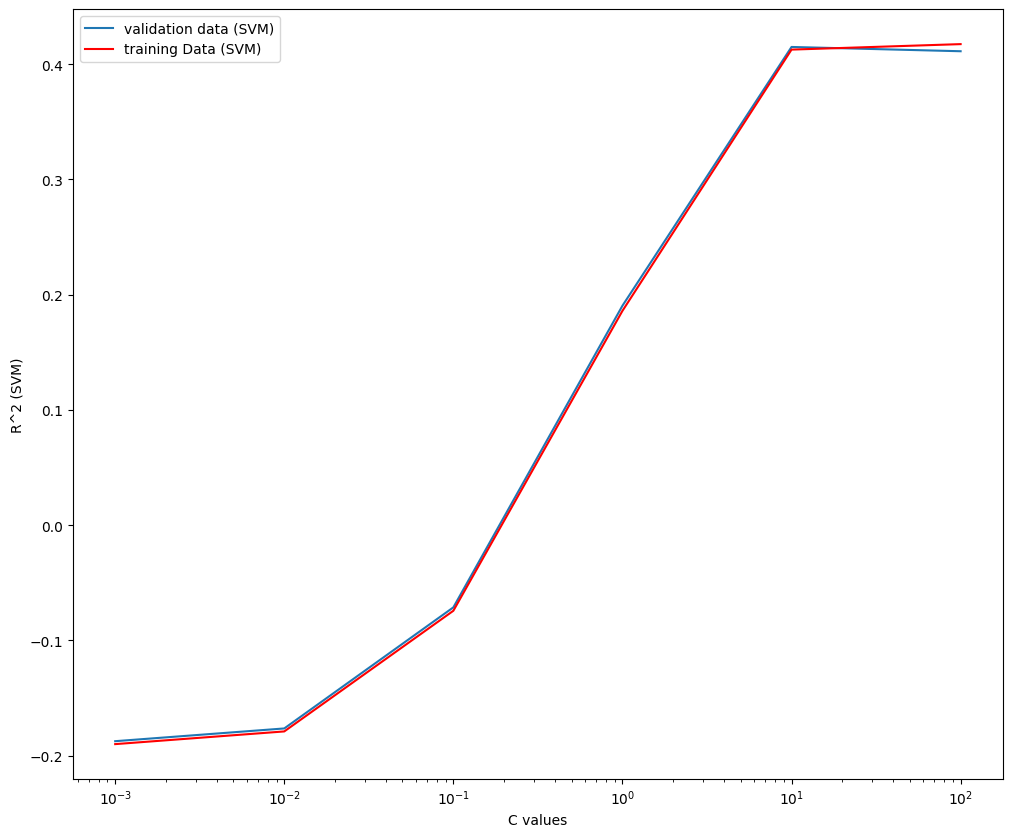

In [ ]:
from sklearn.svm import SVR

# Create an SVR model
svm_model = SVR()

# Train the model
svm_model.fit(X_train_pr, y_train)

# Make predictions on the test data
yhat_svm = svm_model.predict(X_test_pr)

print('predicted (SVM):', yhat_svm[0:4])
print('test set :', y_test[0:4].values)

# Evaluate R-squared for the SVR model
Rsq_test_svm = []
Rsq_train_svm = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # C values for SVM
pbar_svm = tqdm(C_values)

for C_val in pbar_svm:
    svm_model = SVR(C=C_val)
    svm_model.fit(X_train_pr, y_train)
    test_score_svm = svm_model.score(X_test_pr, y_test)
    train_score_svm = svm_model.score(X_train_pr, y_train)
    pbar_svm.set_postfix({"Test Score (SVM)": test_score_svm, "Train Score (SVM)": train_score_svm})
    Rsq_test_svm.append(test_score_svm)
    Rsq_train_svm.append(train_score_svm)

# Plot the results for SVR
plt.figure(figsize=(12, 10))
plt.plot(C_values, Rsq_test_svm, label='validation data (SVM)')
plt.plot(C_values, Rsq_train_svm, 'r', label='training Data (SVM)')
plt.xlabel('C values')
plt.ylabel('R^2 (SVM)')
plt.xscale('log')  # Use log scale for better visualization
plt.legend()
plt.show()
